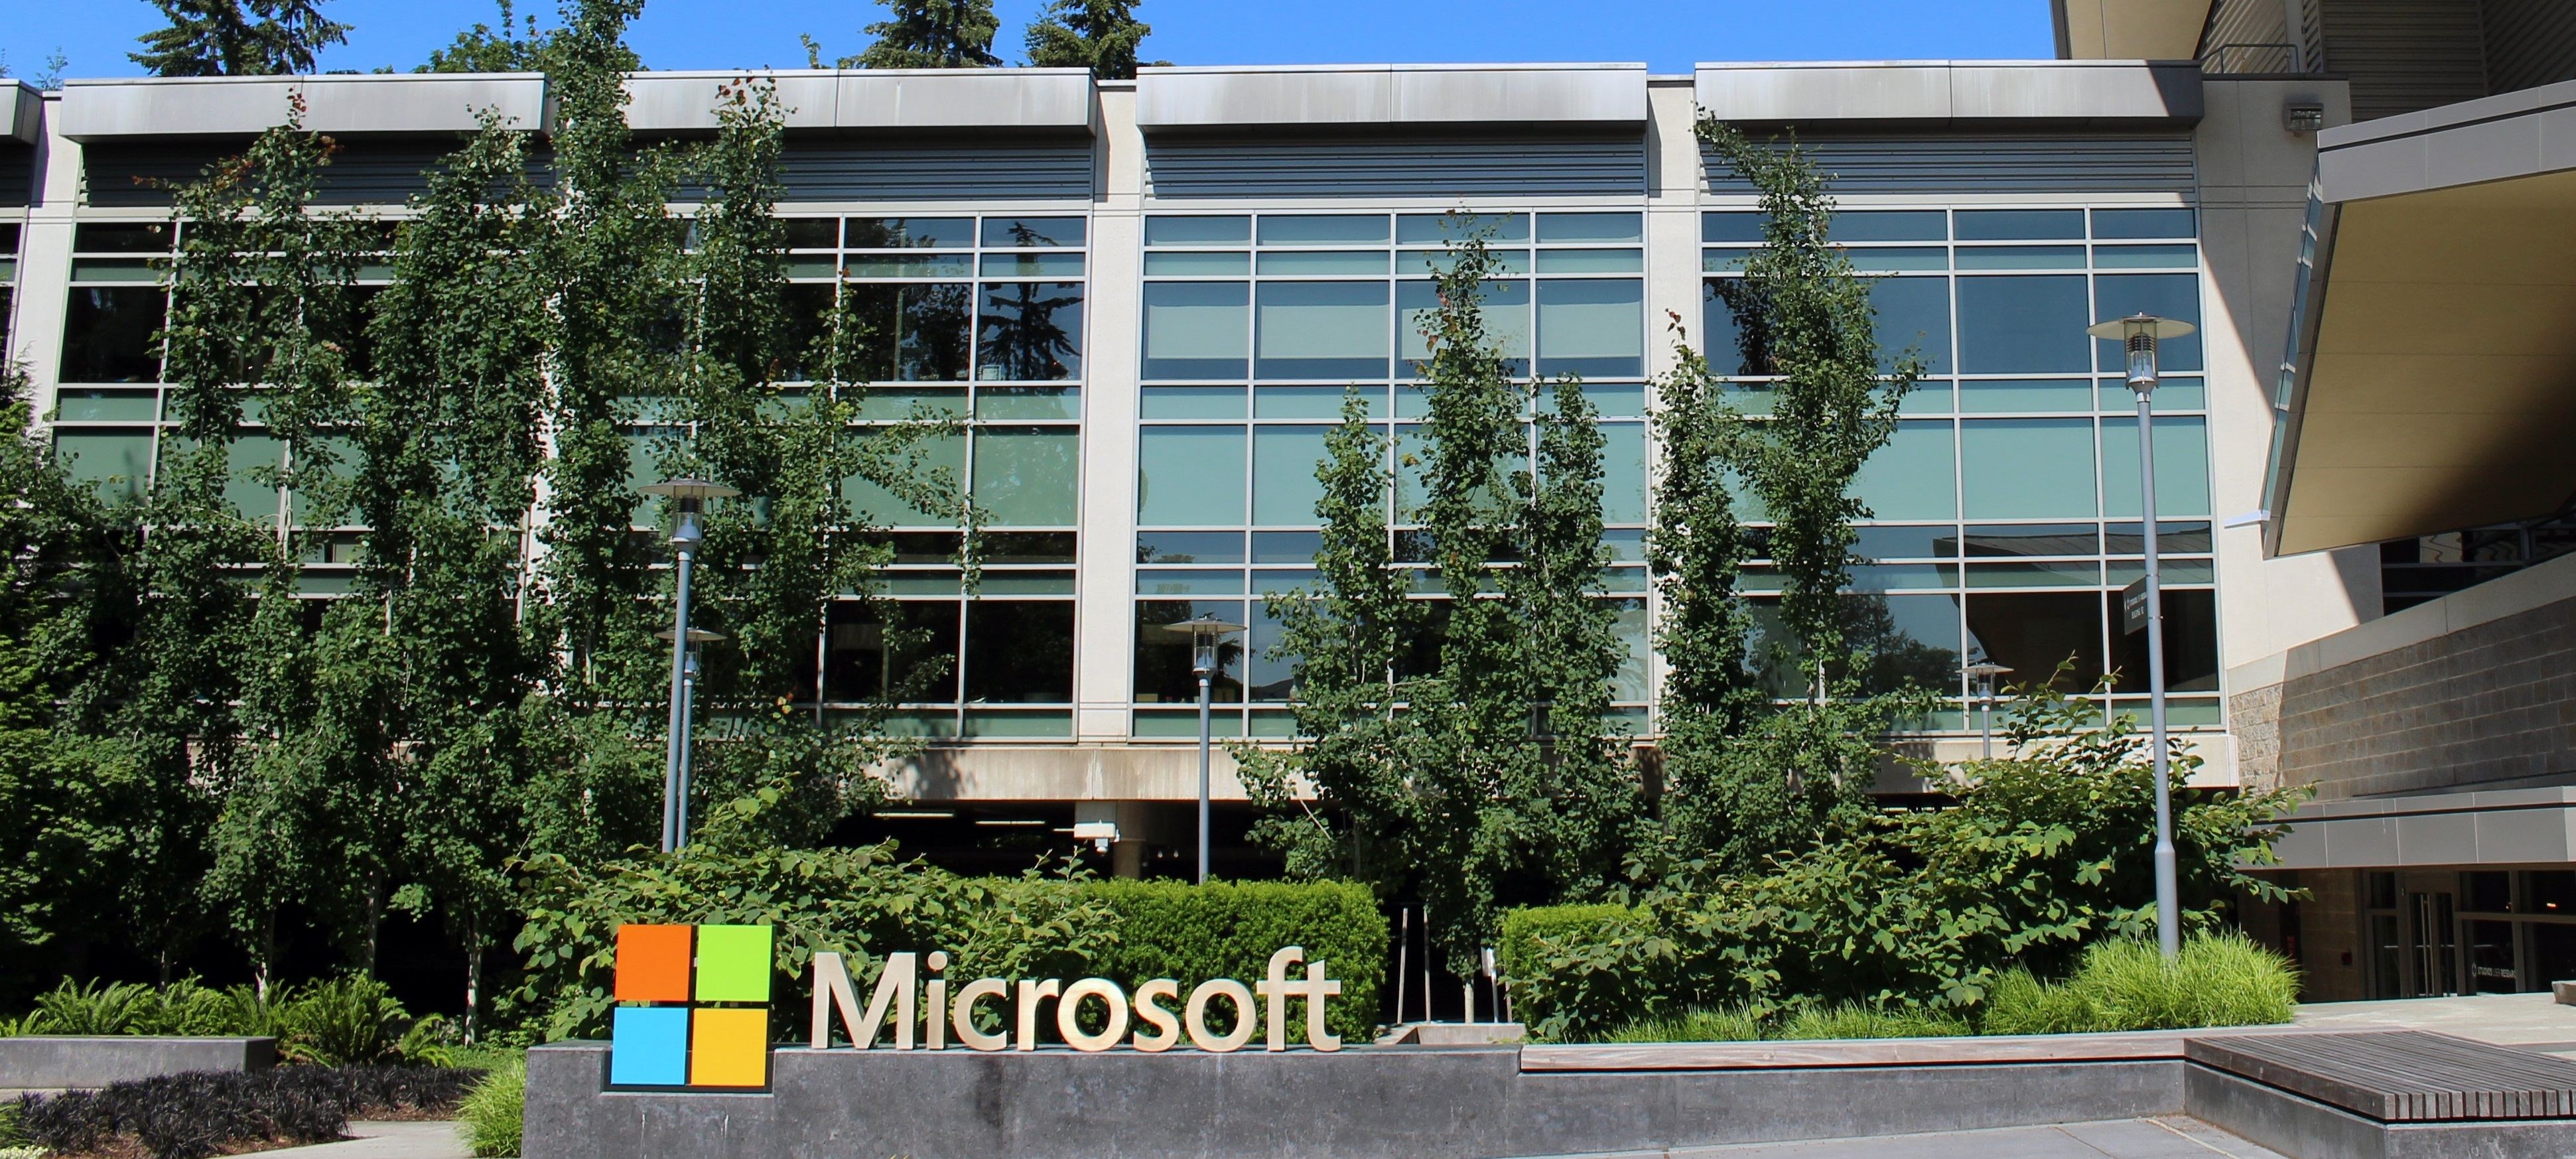

# Microsoft's New Movie Studio

**Authors:** Joe Gil
***

## Overview

Microsoft have decided they would like to open their own studio to create original content. This project analyzes film data from Box Office Mojo, The Numbers and TheMovieDB to provide insights into which genres of films are the most profitable and highest rated, and which current competitiors are the most successful. 

## Business Problem

Microsoft must decide what type of films they would like to create. This analysis focuses on genres of film, and which current studios are most successful. This will provide an insight and help Microsoft begin to shape their direction.


## Data Understanding

There are some excellent datasets, which provide heaps of useful information for this project. Data from Box Office Mojo and The Numbers provides insight into costs and profits, and data from The Movie Database provides a look into genres and ratings. 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import ast

In [31]:
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df2 = pd.read_csv('tn.movie_budgets.csv.gz')
df3 = pd.read_csv('tmdb.movies.csv.gz')

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [17]:
df3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Data Preparation

With df2, I turn the budget and gross columns from strings to integers, this lets me create a profit column. 
With df1, I remove all films by studios that have made less than 20 films. I wish to look at Microsoft's main competitiors. 
I then merge these data sets so I can analyse studio against profit. 

With df3, I change the genre_ids into genre names, and use the explode() function to analyse films with more than one genre. 

In [33]:
df_studio = df1.groupby('studio').filter(lambda x : len(x)>=20)
#removing studios entries with less than 20 films

df_studio = df_studio.drop(columns=['domestic_gross', 'foreign_gross', 'year'])
#removing unneccecary columns

df_studio.head()
#I now have a simple table to work with

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
6,Iron Man 2,Par.


In [34]:
df2 = pd.read_csv('tn.movie_budgets.csv.gz')

columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
for column in columns_to_convert:
    df2[column] = pd.to_numeric(df2[column].replace('[\$,]', '', regex=True), errors='coerce').astype(np.int64)
#above code changes budget and gross columns to integers

df2['profit'] = df2.worldwide_gross - df2.production_budget
#adding a profit column by combining worldwide gross and production budget. focusing on worldwide rather than domestic, 
#assuming microsoft are going for worldwide audiance 


df2.sort_values(by='profit', ascending =False).head()
#can be merged to combine profit with other metrics, ordered from most profitable to lease. 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


In [35]:
df_profit = df2.drop(columns=['id', 'release_date', 'production_budget', 'domestic_gross', 'worldwide_gross'])
df_profit.head()
#unneccecary columns removed to simplify merge 

,movie,profit
0,Avatar,2351345279
1,Pirates of the Caribbean: On Stranger Tides,635063875
2,Dark Phoenix,-200237650
3,Avengers: Age of Ultron,1072413963
4,Star Wars Ep. VIII: The Last Jedi,999721747


In [36]:
merged_df = pd.merge(df_studio, df_profit, left_on='title', right_on='movie', how='inner')
#merging data from studio and profit data frames

merged_df = merged_df.drop(columns=['movie','title'])
#movie titles removes, as not needed

df_final = merged_df.groupby('studio', as_index =False).mean()
#grouping studio releases together, then finding the average

df_final = df_final.sort_values(by='profit', ascending=False)
#sorting by profit, in decending order

df_final.head()

,studio,profit
2,BV,3.310447e+08
32,Uni.,1.771931e+08
9,Fox,1.730938e+08
34,WB (NL),1.727639e+08
28,Sony,1.696123e+08


In [28]:
#this dataframe is now ready to provide insights into the profitibilities of all main competitiors

In [57]:
#dictionary of genre_id taken from the tmdb website
genre_map = {28:"Action",
12:"Adventure",14: "Fantasy",
16:"Animation",
35:"Comedy",
80: "Crime", 99:"Documentary",
18:"Drama",
10751:"Family", 14:"Fantasy",
36:"History",
27:"Horror",
10402:"Music", 9648:"Mystery",
10749:"Romance",
878:"Science Fiction",
10770:"TV Movie",
53:"Thriller",
10752:"War",
37: "Western"}

def map_genres(genre_ids):
    return [genre_map.get(genre_id, 'Unknown') for genre_id in genre_ids]
#function to map the genre id to the name of the genre

df3['genre_names'] = df3['genre_ids'].apply(map_genres)
#implementing the function to create a new column with column names

df_genres = df3.drop(columns = ['id', 'original_language','popularity', 'release_date',
                                'title','vote_average', 'vote_count', 'genre_ids', 'Unnamed: 0']) 
#removing any columns I'm not interested in
df_genres.head()

,original_title,genre_names
0,Harry Potter and the Deathly Hallows: Part 1,"[Adventure, Fantasy, Family]"
1,How to Train Your Dragon,"[Fantasy, Adventure, Animation, Family]"
2,Iron Man 2,"[Adventure, Action, Science Fiction]"
3,Toy Story,"[Animation, Comedy, Family]"
4,Inception,"[Action, Science Fiction, Adventure]"


In [59]:
#I now plan to merge genres and profit using the movie titles
merged_df2 = pd.merge(df_profit, df_genres, left_on='movie', right_on='original_title', how='inner')
merged_df2 = merged_df2.drop(columns = ['original_title', 'movie'])
merged_df2 = merged_df2.explode('genre_names')
#the function explode splits the list of strings in the column into their own individual rows

df25 = merged_df2.groupby('genre_names', as_index =False).mean()
df255 = df25.sort_values(by =['profit'], ascending = False)
df255.head()

#I now have the average profit of each genre, ready for modeling

,genre_names,profit
2,Animation,2.558782e+08
1,Adventure,2.392808e+08
8,Fantasy,2.156837e+08
7,Family,2.094783e+08
14,Science Fiction,1.731765e+08


In [75]:
df35 = df3.drop(columns =['id', 'original_language','popularity', 'release_date',
                                'title', 'vote_count', 'genre_ids', 'Unnamed: 0','original_title'])
#this time I'm focusing on genres and their ratings


df35 = df35.explode('genre_names')
#using the explode function again


df_rating = df35.groupby('genre_names', as_index = False).mean()
#getting the average rating by genre

df_rating1 = df_rating.sort_values(by =['vote_average'], ascending = False)
df_rating1.describe()

,vote_average
count,19.000000
mean,5.979121
std,0.509039
min,4.847624
25%,5.768571
50%,5.952327
75%,6.170797
max,6.952407


## Data Modeling


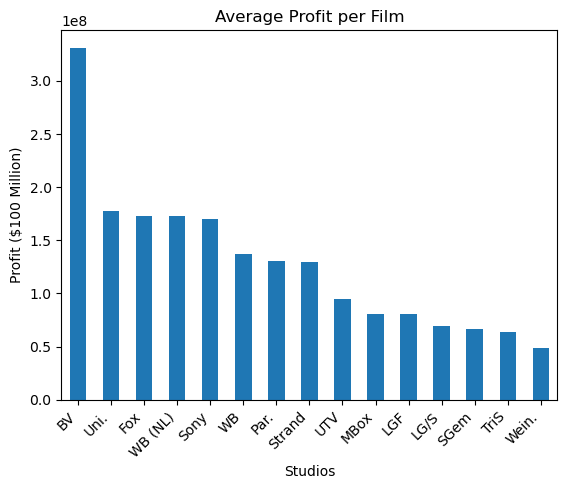

In [74]:
df_top15 = df_final.head(15)
#picking the 15 most profitable studios to highlight in bar chart

df_top15.plot(x='studio', y='profit', kind='bar', legend=False)
plt.title('Average Profit per Film')
plt.xlabel('Studios')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Profit ($100 Million)')
plt.show()


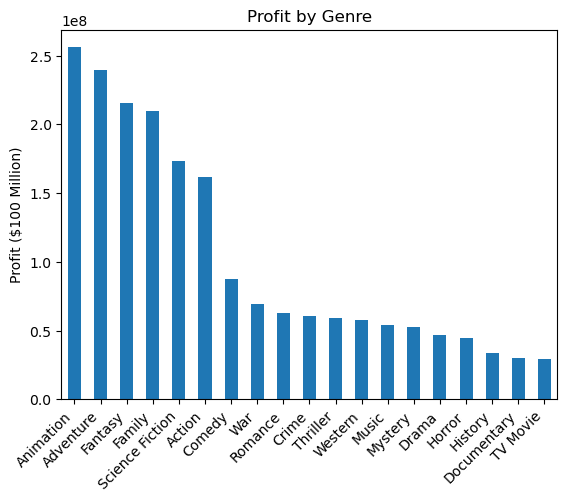

In [71]:
df255.plot(x='genre_names', y='profit', kind='bar', legend=False)
plt.title('Profit by Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Profit ($100 Million)')
plt.xlabel('')
plt.show()

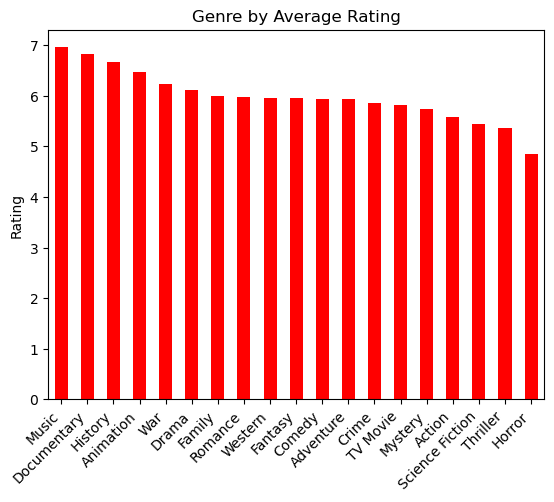

In [72]:
df_rating1.plot(x='genre_names', y='vote_average', kind='bar', legend=False, color = 'red')
plt.title('Genre by Average Rating')
plt.ylabel('Rating')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

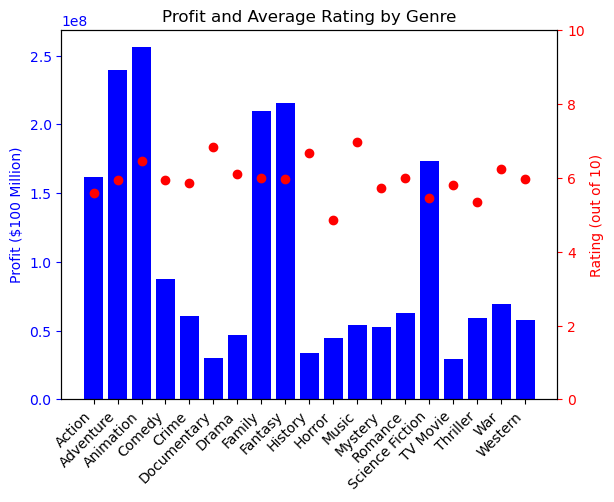

In [73]:
fig, ax1 = plt.subplots()

# Plotting Profit as a bar graph on the primary y-axis
ax1.bar(df25['genre_names'], df25['profit'], label='Profit', color='blue')
plt.xticks(rotation=45, ha='right')
ax1.set_ylabel('Profit ($100 Million)', color='blue')
ax1.tick_params('y', colors='blue')

# Creating a secondary y-axis for Average Rating
ax2 = ax1.twinx()
#scaled_rating = df_rating['vote_average'] * 2
ax2.scatter(df25['genre_names'], df_rating['vote_average'], color='red', label='Average Rating (out of 10)')
ax2.set_ylabel('Rating (out of 10)', color='red')
ax2.tick_params('y', colors='red')
ax2.set_ylim(0,10)

# Adding titles
plt.title('Profit and Average Rating by Genre')

# Display the plot
plt.show()

## Evaluation

There are a number of insights to gain through the data visualisations above. 

Firstly, we can we can see that the top competitors are making on average over $100 million per movie, showing that Microsoft are certainly right in wishing to persue diversification into this industry. 

Disney are making the most profit per film by far, at over $300 million. If we look at our second graph, we can see an insight into why. The top 4 most profitable genres are animation, adventure, fantasy and family. Almost all Disney films fall into these categories. 

Animation, adventure, fantasy, family, science ficton and action are the most popular genres. There is a steeper drop off after this. These genres are have the most universal audience. The genres that come after this will often have a more niche audience. 

With a standard deviation of only 0.5, you can see that the average ratings don't vary too massively based on genre, with horror being the lowest scoring. The three highest scoring genres are music, documentary and history. Interestingly, these genres aren't particuarly comercially successful.  


From the final graph, we can see there is not a direct correlation between the average profit a genre will give, 
and it's average rating. For example, films about music have the highest ratings on average(6.95). However they make roughly 
119 million less than the average sci-fi film, which has an average rating of (5.44). 


## Conclusions

From the analysis above we can see that film is a luctrative industry and should certainly be persued. 

I have provided a breif analysis into the most successful studios, but addtional analysis is recommended. I would look suggest more research into how these studios operate, what directors and writers they work with. 

It is clear that animation, adventure, fantasy and family are the most lucrative genres with the widest appeal. I recommend focusing on these. 

It is worth noting that the advertising budget and strategy has not been considered, this could play a big impact on how successful a studio is. It's worth a further look into this. 
